# Project Progress Report

<div align="center"> TEAM 22 </div>
<div align="center">NAME : DONGMIN KIM, HAYEON KIM, MINSU NA, YEONGMIN LEE </div>
 
We aim to develop a **“What-to-Play-Next”** recommendation system using the Spotify
Million Playlist Dataset. Our goal is to design a model that can personalized next
song recommendations based on a given set of listening histories or user
preferences.

[Progress report requirements]
Progress report is a check-in to show that you have made progress towards the completion of the project. By the project progress due date, your team should have:

- Obtained all or most of the data
- Come up with a reasonable model
- Produced at least one promising result
- Provide a convincing argument for the feasibility of completing the project within the time available

In [1]:
# 빼도 되는건..가?
%cd ..
%load_ext autoreload
%autoreload 2

/home/dongmin/userdata/dongmin/robot-radio-station


## Data Preprocess

In [19]:
import os
from pathlib import Path
from operator import itemgetter
from collections import Counter

import math
import random

import json
import csv

import numpy as np
import matplotlib.pyplot as plt

dprint = lambda x: print(json.dumps(x, indent=2))

In [3]:
HOME = Path.home()
CWD = Path.cwd()

In [10]:
DATASET_DIR = HOME / 'userdata' / 'dongmin' / 'smp_dataset'
DATA_DIR = DATASET_DIR / 'data'

#### 1. Import data

In [12]:
json_paths = DATA_DIR.glob('*.json')
json_paths = sorted(json_paths, key=lambda x: int(x.stem.split('.')[-1].split('-')[0]))
json_paths = list(json_paths)

len(json_paths), json_paths[:5]

(1000,
 [PosixPath('/home/dongmin/userdata/dongmin/smp_dataset/data/mpd.slice.0-999.json'),
  PosixPath('/home/dongmin/userdata/dongmin/smp_dataset/data/mpd.slice.1000-1999.json'),
  PosixPath('/home/dongmin/userdata/dongmin/smp_dataset/data/mpd.slice.2000-2999.json'),
  PosixPath('/home/dongmin/userdata/dongmin/smp_dataset/data/mpd.slice.3000-3999.json'),
  PosixPath('/home/dongmin/userdata/dongmin/smp_dataset/data/mpd.slice.4000-4999.json')])

In [17]:
playlists = []

for j_p in json_paths:
  with open(j_p, 'r') as f:
    chunk = json.load(f)
    playlists += chunk['playlists']

len(playlists), playlists[0]

(1000000,
 {'name': 'Throwbacks',
  'collaborative': 'false',
  'pid': 0,
  'modified_at': 1493424000,
  'num_tracks': 52,
  'num_albums': 47,
  'num_followers': 1,
  'tracks': [{'pos': 0,
    'artist_name': 'Missy Elliott',
    'track_uri': 'spotify:track:0UaMYEvWZi0ZqiDOoHU3YI',
    'artist_uri': 'spotify:artist:2wIVse2owClT7go1WT98tk',
    'track_name': 'Lose Control (feat. Ciara & Fat Man Scoop)',
    'album_uri': 'spotify:album:6vV5UrXcfyQD1wu4Qo2I9K',
    'duration_ms': 226863,
    'album_name': 'The Cookbook'},
   {'pos': 1,
    'artist_name': 'Britney Spears',
    'track_uri': 'spotify:track:6I9VzXrHxO9rA9A5euc8Ak',
    'artist_uri': 'spotify:artist:26dSoYclwsYLMAKD3tpOr4',
    'track_name': 'Toxic',
    'album_uri': 'spotify:album:0z7pVBGOD7HCIB7S8eLkLI',
    'duration_ms': 198800,
    'album_name': 'In The Zone'},
   {'pos': 2,
    'artist_name': 'Beyoncé',
    'track_uri': 'spotify:track:0WqIKmW4BTrj3eJFmnCKMv',
    'artist_uri': 'spotify:artist:6vWDO969PvNqNYHIOW5v0m',
    

#### 2. Data Status

**\# of tracks in a playlist**
* mean: 66.346428
* std: 53.66933116446316
* min: 5
* max: 376

True


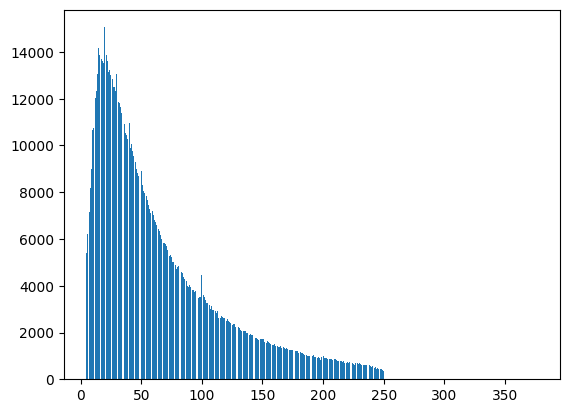

mean: 66.346428
std: 53.66933116446316
min: 5
max: 376


In [23]:
num_tracks = [ (len(p['tracks']), p['num_tracks']) for p in playlists ]
print(all([ x[0] == x[1] for x in num_tracks ]))

num_tracks = [ x[0] for x in num_tracks ]
num_tracks_cnt = Counter(num_tracks)

plt.bar(num_tracks_cnt.keys(), num_tracks_cnt.values())
plt.title('# of tracks in a playlist')
plt.show()

print(f'mean: {np.mean(num_tracks)}')
print(f'std: {np.std(num_tracks)}')
print(f'min: {min(num_tracks)}')
print(f'max: {max(num_tracks)}')

**\# of unique tracks in dataset**
* \# total tracks: 66,346,428
* \# unique tracks: 2,262,292 (2M)

In [22]:
uri_list = [ 
  t['track_uri'].split(':')[-1]
  for p in playlists
  for t in p['tracks']
]

print(f'num total tracks: {len(uri_list)}')
print(f'num unique tracks: {len(set(uri_list))}')

num total tracks: 66346428
num unique tracks: 2262292


**# of unique albums in dataset**
* \# unique albums: 734,684

In [25]:
uri_list = [ 
  t['album_uri'].split(':')[-1]
  for p in playlists
  for t in p['tracks']
]

print(f'num unique: {len(set(uri_list))}')

num unique: 734684


**# of unique artists in dataset**
* \# unique artists: 295,860

In [26]:
uri_list = [ 
  t['artist_uri'].split(':')[-1]
  for p in playlists
  for t in p['tracks']
]

print(f'num unique aritst: {len(set(uri_list))}')

num unique aritst: 295860


## Model

#### 1. Model architecture

왜 우리가 이 모델을 선택했는지 + 이 모델의 장점 부가설명 간략하게 추가

## Results

#### 1.

시각화 2개이상

## Conclusion & Future Plan

#### 1. Conclusion

#### 2. Future Plan

이미지 넣어서 같이 설명하면 좋을듯